In [318]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB

In [319]:
df = pd.read_csv('spanishFakeNews.csv')
df.head()


,texto,clase
0,El año pasado la Ciudad de México se estremeci...,fake
1,Manuela Carmena pide a los madrileños que guar...,fake
2,Una fuerte sorpresa se llevó el todavía presid...,fake
3,La 1 de Televisión Española repitió ayer como ...,fake
4,685 curas católicos fueron acusados de abuso s...,real


In [320]:
stemmer = nltk.stem.SnowballStemmer('spanish')
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [321]:
print(df['texto'][15])
print(df['clase'][15])

Gran sorpresa y asombró experimentan millones de mexicanos luego de que el nuevo presidente electo, López Obrador, organizará una conferencia de prensa para informar que ha decidido renunciar a su cargo de Jefe de Estado, esto tras percatarse que "ser mandatario de un país es un negocio exclusivo para la mafia del poder", señalando que pese a ser uno de los hombres más buenos del universo poco a poco ha comenzado a dejarse seducir por la corrupción , por lo que prefiere "terminar con el pueblo de México" antes de hacerle daño. Obrador menciona que los 15 años que duró siendo candidato "era una persona normal, rechazado y odiado por muchos", sin embargo cuando tomó el poder hasta sus adversarios se rindieron a sus pies, cosa que lo ha descontrolado: "Quiero aclarar que ahora entiendo a la mafia del poder, no los justificó pero definitivamente comprendo que el hecho de tener tanto poder descontrola a cualquiera, incluso a los que tenemos un nivel de santidad solo debajo de nuestro señor 

Text(30.570061728395068, 0.5, 'Conteo')

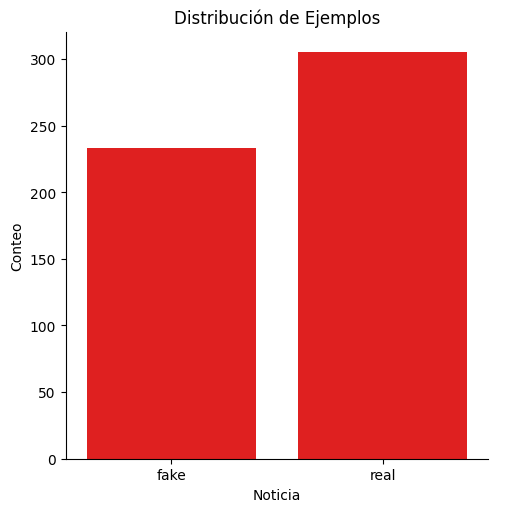

In [322]:
sns.catplot(x='clase', kind='count', color='r', data=df)
plt.title('Distribución de Ejemplos')
plt.xlabel('Noticia')
plt.ylabel('Conteo')

In [323]:
def processing_text(texto):
  # Paso 1: Remover con un expresión regular carateres especiales (no␣ ,→palabras).
  processed_feature = re.sub(r'\W', ' ', str(texto))
  # Paso 2: Remover ocurrencias de caracteres individuales
  processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)
  processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature)
  # Paso 3: Remover números (Ocurrencias muy esporádicas en nuestro dataset)
  processed_feature = re.sub(r'[0-9]+', ' ', processed_feature)
  # Paso 4: Simplificar espacios concecutivos a un único espacio entre, palabras
  processed_feature = re.sub(' +', ' ', processed_feature)
   # Paso 5: Pasar todo el texto a minúsculas
  processed_feature = processed_feature.lower()
  processed_feature = " ".join([stemmer.stem(i) for i in processed_feature.split()])
  # Paso 6: remover tildes y diéresis y ñ
  processed_feature = processed_feature.replace('á', 'a')
  processed_feature = processed_feature.replace('é', 'e')
  processed_feature = processed_feature.replace('í', 'i')
  processed_feature = processed_feature.replace('ó', 'o')
  processed_feature = processed_feature.replace('ú', 'u')
  processed_feature = processed_feature.replace('ü', 'u')
  processed_feature = processed_feature.replace('ñ', 'n')
  processed_feature = re.sub(r'[¿¡“”«»—]', '', processed_feature)
  return processed_feature

In [324]:
texto_para_procesar = df['texto'].values
labels = df['clase'].values

texto_procesado = []
for sentence in range(0, len(texto_para_procesar)):
    procesado = processing_text(texto_para_procesar[sentence])
    texto_procesado.append(procesado)

In [325]:
texto_procesado[:5]

['el ano pas la ciud de mexic se estremec lueg de que se anunci que godzill lleg la ciud per no de form literal porqu el mounstr ni siqu exist en la vid real sin que los productor film escen de la nuev pelicul lo que origin una gran expect sobr tod divert chist mem sobr el fatal destin que tendr godzill al pis nuestr pais fue poc lo que se sup del tem principal porqu el rodaj fue mas rap de lo que se esper sol dos seman a diferent de otras cint com la de jam bond spectr dond se denunc que hab dan edifici la filmacion de godzill corr sin contratiemp com si sol hub grab tom las fach de algun edifici com estas pelicul tard anos en sal la luz final mostr dos trailers oficial de la cint que se estren en el veran del ver com godzill destru la cdmx por lo men la ciud aparec unos segund en la cint ya que much vec estas cint film aqu hac much ruid per en realid nuestr pais termin sol sal un par de minut cuadr en el trail no se apreci cienci exact si godzill atac mexic per si se visualiz perfect

In [326]:
print("Sin procesar:")
print(texto_para_procesar[289])
print("---------------------------------")
print("Procesado:")
print(texto_procesado[289])

Sin procesar:
Durante la toma de protesta de López Obrador, sorpresivamente un personaje cobró enorme popularidad al grado de que ya es una celebridad en las redes sociales: se trata de Giovanni Lizárraga, un joven cadete elegido para colocarle la banda presidencial al nuevo mandatario, y que sirvió como guardia durante el evento protocolario. Lizárraga llamó la atención de las mujeres y los gays por ser atractivo y bien parecido , e incluso también tuvo el interés de los varones heterosexuales, quienes comenzaron a criticarlo y asegurar "que el cadete no es tan atractivo y las mujeres se emocionan por cualquier cosa". Sean peras o manzanas, el hombre arrancó suspiros, y es por eso que rápidamente comenzaron a circular unas aparentes fotografías del chico totalmente desnudo, y mostrando su miembro erecto. Las imágenes rápidamente se viralizaron, sin embargo, algunos notaron que el hombre encuerado de las fotos efectivamente se parece al viril cadete, pero en realidad podría no tratarse

In [327]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [328]:
vectorizer = CountVectorizer(max_features=2500, stop_words=stopwords.words('spanish'))
texto_features = vectorizer.fit_transform(texto_procesado).toarray()

In [329]:
vectorizer.get_feature_names_out()[:10]

array(['abaj', 'abandon', 'abiert', 'abog', 'abon', 'abord', 'abraz',
       'abri', 'abril', 'abrir'], dtype=object)

In [330]:
X_train, X_test, y_train, y_test = train_test_split(texto_features, labels,test_size=0.2, random_state=0)

# print('X_train:', X_train)
nb = MultinomialNB()

nb.fit(X_train, y_train)

MultinomialNB()

In [331]:
predictions = nb.predict(X_test)

In [332]:
print(accuracy_score(y_test, predictions))

0.9722222222222222


In [333]:
# Dataset testing
df_test = pd.read_csv('testSpanishFakeNews.csv')
df_test.head()

,texto,clase
0,Las concursantes del Miss Universo 2018 han co...,fake
1,Luego de mantener un perfil bajo por el éxito ...,fake
2,Gran sorpresa se llevó la hija de Donald Trump...,fake
3,Aunque muchos los odien y los critiquen porque...,fake
4,"Nacional , Salud y bienestar. Polémica por cer...",fake


0.9333333333333333
              precision    recall  f1-score   support

        fake       0.92      0.92      0.92        26
        real       0.94      0.94      0.94        34

    accuracy                           0.93        60
   macro avg       0.93      0.93      0.93        60
weighted avg       0.93      0.93      0.93        60



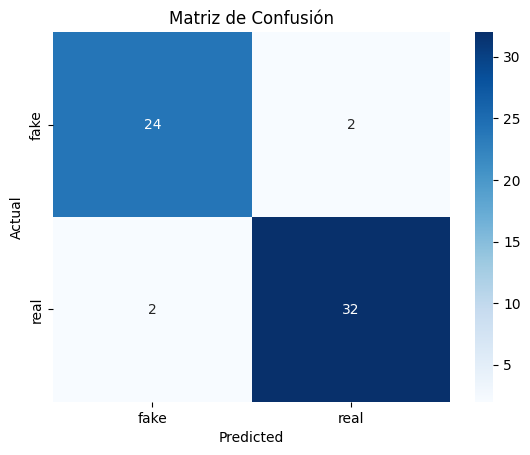

In [334]:
def process_nlp(text):
    processed = processing_text(text)
    features = vectorizer.transform([processed]).toarray()
    return nb.predict(features)[0]

df_test['prediccion'] = df_test['texto'].apply(process_nlp)
df_test.tail()

print(accuracy_score(df_test['prediccion'], df_test['clase']))
print(classification_report(df_test['clase'], df_test['prediccion']))

sns.heatmap(pd.crosstab(df_test['clase'], df_test['prediccion'], rownames=['Actual'], colnames=['Predicted']), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión')
plt.show()